# K-modes and Association rules mining for analyzing  accident data in Senegal

### Importing libraries

In [1590]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn import tree
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from apyori import apriori
from fanalysis.mca import MCA

### Importing dataset

In [1591]:
data = pd.read_csv('Base.csv')
print(data.shape)
data.head()

(6739, 97)


,Unnamed: 0,instanceID,numero_questionnaire,code,lieu_enquete,Nom,fonction,telephone,date_enquete,prenom_nom_enqueteur,...,vehicule2usage,vehicule2visite_technique_regl,vehicule2age_vehicule,vehicule3numero_vehicule,vehicule3type,vehicule3usage,vehicule3visite_technique_regl,vehicule3age_vehicule,id,nature_degat
0,0,uuid:c83a9439-7187-4ca1-8560-816db261e253,1514,NIS,Commissariat bel air,Abdoulaye niassy,Chef section accident,775326421,11/6/2017,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,1,uuid:4e0d2e6b-255c-4884-bc3e-b69fb6272228,1515,NIS,Commissariat bel air,Abdoulaye niassy,Chef de section accident,775326421,11/6/2017,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
2,2,uuid:9a0726e5-de13-4f2a-a3ed-36257c7f6ab5,1516,NTF,Commissariat de bel air,Mr ABDOULAYE NIASSY,CHEF SECTION ACCIDENT,775326421,11/6/2017,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0
3,3,uuid:4dc97b25-aad3-4eb9-a7bb-0ff321a96284,1517,NTF,Commissariat de bel air,Mr ABDOULAYE NIASSY,Chef section accident,775326421,11/6/2017,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0
4,4,uuid:43a028f9-2c84-4cdf-95e0-0b19c8c8e9fc,1518,MAS,Commissariat de bel air,Mr Abdoulaye niassy,Chef section accident,775326421,11/6/2017,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0


## Data Preprocessing

In [1592]:
data.columns 

Index(['Unnamed: 0', 'instanceID', 'numero_questionnaire', 'code',
       'lieu_enquete', 'Nom', 'fonction', 'telephone', 'date_enquete',
       'prenom_nom_enqueteur', 'prenom_nom_expert_superieur',
       'prenom_nom_operateur', 'numero_dossier_sinistre', 'type_PV',
       'nature_degats_causes_accident', 'accident_materiel',
       'accident_corporel', 'accident_mat_corp', 'nb_veh_impl',
       'analyse_responsabilite', 'vehicule0numero_vehicule', 'vehic_type',
       'vehic_usage', 'vehicule0visite_technique_regl', 'visite_techni',
       'vehicule0age_vehicule', 'age_vehicle', 'assurance', 'assurance2',
       'assurance_auto', 'date_accident', 'annee', 'jour_accident',
       'jour_ferie', 'mois_accident', 'tranche_horaire_accident',
       'tranche_horaire', 'periode_accident', 'autres_fetes',
       'localite_survenance', 'lieu_survenance', 'region_survenance', 'region',
       'tranche_ge_presume_responsable', 'tranche_age', 'sexe_conducteur',
       'profession_conducteur_pre

### > Cleanning data

In [1593]:
data.drop(['Unnamed: 0','instanceID','numero_questionnaire','code','lieu_enquete',
 'Nom','fonction','telephone','date_enquete','prenom_nom_enqueteur',
 'prenom_nom_expert_superieur', 'prenom_nom_operateur',
 'numero_dossier_sinistre','type_PV','id','fin',
 'observations_particulieres_accid',
 'vehicule3numero_vehicule','vehicule2numero_vehicule',
 'vehicule1numero_vehicule','vehicule0numero_vehicule',
 'autres_relevees', 'etat_route_r','type_route_r',
 'types_route1','types_route2','vehicule3visite_technique_regl',
'vehicule2visite_technique_regl','vehicule1visite_technique_regl',
'vehicule1type','vehicule1usage','vehicule1age_vehicule',
 'vehicule2type','vehicule2usage', 'vehicule2age_vehicule',
 'vehicule3type','vehicule3usage','vehicule3age_vehicule',
 'age_permis_r', 'nature_degat',
 'autres_origine_permis',               
'autres_fetes',                        
'autres_type_route',                   
'autre_profession',                    
'assurance',                            
'tranche_horaire_accident',             
'profession_conducteur_presume_re',     
'lieu_survenance',                       
'region_survenance','vehicule0visite_technique_regl','accident_materiel',
'accident_corporel','accident_mat_corp','vehicule0age_vehicule'], axis='columns', inplace=True, index=None)

### > Check missing values

In [1594]:
data.isnull().sum().sort_values(ascending=False)

absence_signalisation               0
annee                               0
tranche_ge_presume_responsable      0
region                              0
localite_survenance                 0
periode_accident                    0
tranche_horaire                     0
mois_accident                       0
jour_ferie                          0
jour_accident                       0
date_accident                       0
sexe_conducteur                     0
assurance_auto                      0
assurance2                          0
age_vehicle                         0
visite_techni                       0
vehic_usage                         0
vehic_type                          0
analyse_responsabilite              0
nb_veh_impl                         0
tranche_age                         0
profession_conduc_r                 0
animaux_divagation                  0
impact_conditions_atmospheriques    0
ralentisseurs                       0
non_resp_pann_signal                0
exces_vitess

In [1595]:
data.shape

(6739, 43)

In [1596]:
data.columns

Index(['nature_degats_causes_accident', 'nb_veh_impl',
       'analyse_responsabilite', 'vehic_type', 'vehic_usage', 'visite_techni',
       'age_vehicle', 'assurance2', 'assurance_auto', 'date_accident', 'annee',
       'jour_accident', 'jour_ferie', 'mois_accident', 'tranche_horaire',
       'periode_accident', 'localite_survenance', 'region',
       'tranche_ge_presume_responsable', 'tranche_age', 'sexe_conducteur',
       'profession_conduc_r', 'origine_permis', 'age_permis', 'types_route0',
       'etat_route', 'agglom_camp', 'cas_virage', 'intersection',
       'regles_priorite', 'impact_luminosite_moment_acciden', 'luminosite',
       'impact_conditions_atmospheriques', 'condit_atmosph',
       'conduite_etat_ebriete', 'perte_controle_conducteur',
       'Depassement_defectueux', 'stationnement_irregulier', 'exces_vitesse',
       'non_resp_pann_signal', 'ralentisseurs', 'animaux_divagation',
       'absence_signalisation'],
      dtype='object')

### > Data converting and tranforming

In [1597]:
data.loc[  (data["conduite_etat_ebriete"]=='Oui'), 'conduite_etat_ebriete'] = 'cond en etat ebriete'
data.loc[  (data["conduite_etat_ebriete"]=='Non'), 'conduite_etat_ebriete'] = 'cond en etat normal'

data.loc[  (data["non_resp_pann_signal"]=='Oui'), 'non_resp_pann_signal'] = 'non resp pann signal'
data.loc[  (data["non_resp_pann_signal"]=='Non'), 'non_resp_pann_signal'] = 'resp pann signal'

data.loc[  (data["exces_vitesse"]=='Oui'), 'exces_vitesse'] = 'exces vitesse'
data.loc[  (data["exces_vitesse"]=='Non'), 'exces_vitesse'] = 'vitesse normale'

data.loc[  (data["perte_controle_conducteur"]=='Oui'), 'perte_controle_conducteur'] = 'perte controle conducteur'
data.loc[  (data["perte_controle_conducteur"]=='Non'), 'perte_controle_conducteur'] = 'non perte controle conducteur'

data.loc[  (data["Depassement_defectueux"]=='Oui'), 'Depassement_defectueux'] = 'Depassement defectueux'
data.loc[  (data["Depassement_defectueux"]=='Non'), 'Depassement_defectueux'] = 'Pas Depassement defectueux'

data.loc[  (data["animaux_divagation"]=='Oui'), 'animaux_divagation'] = 'animaux divagation'
data.loc[  (data["animaux_divagation"]=='Non'), 'animaux_divagation'] = 'Pas animaux divagation'

data.loc[  (data["absence_signalisation"]=='Oui'), 'absence_signalisation'] = 'absence signalisation'
data.loc[  (data["absence_signalisation"]=='Non'), 'absence_signalisation'] = 'signalisation'


data.loc[  (data["ralentisseurs"]=='Non'), 'ralentisseurs'] = 'Pas ralentisseurs'
data.loc[  (data["ralentisseurs"]=='Oui'), 'ralentisseurs'] = 'ralentisseurs'

data.loc[  (data["ralentisseurs"]=='Oui'), 'ralentisseurs'] = 'ralentisseurs'
data.loc[  (data["ralentisseurs"]=='Oui'), 'ralentisseurs'] = 'ralentisseurs'

data.loc[  (data["visite_techni"]=='Oui'), 'visite_techni'] = 'visite techni Ok'
data.loc[  (data["visite_techni"]=='Non'), 'visite_techni'] = 'Defaut visite techni'


In [1598]:
data.columns = data.columns.str.replace("types_route0","types_route")

In [1599]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6739 entries, 0 to 6738
Data columns (total 43 columns):
nature_degats_causes_accident       6739 non-null object
nb_veh_impl                         6739 non-null object
analyse_responsabilite              6739 non-null object
vehic_type                          6739 non-null object
vehic_usage                         6739 non-null object
visite_techni                       6739 non-null object
age_vehicle                         6739 non-null object
assurance2                          6739 non-null object
assurance_auto                      6739 non-null object
date_accident                       6739 non-null object
annee                               6739 non-null float64
jour_accident                       6739 non-null object
jour_ferie                          6739 non-null object
mois_accident                       6739 non-null object
tranche_horaire                     6739 non-null object
periode_accident                    6

#### Converting annee into categorical variable:

In [1600]:
data.loc[  (data["annee"]== 2014.0), 'annee_'] = '2014_'
data.loc[  (data["annee"]== 2015.0), 'annee_'] = '2015_'
data.loc[  (data["annee"]== 2016.0), 'annee_'] = '2016_'
data.loc[  (data["annee"]== 2017.0), 'annee_'] = '2017_'
data.drop(['annee'], axis='columns', inplace=True, index=None)

## Exploratory studies

### > Describe the data

In [1601]:
data.describe()

,nature_degats_causes_accident,nb_veh_impl,analyse_responsabilite,vehic_type,vehic_usage,visite_techni,age_vehicle,assurance2,assurance_auto,date_accident,...,conduite_etat_ebriete,perte_controle_conducteur,Depassement_defectueux,stationnement_irregulier,exces_vitesse,non_resp_pann_signal,ralentisseurs,animaux_divagation,absence_signalisation,annee_
count,6739,6739,6739,6739,6739,6739,6739,6739,6739,6739,...,6739,6739,6739,6739,6739,6739,6739,6739,6739,6739
unique,3,5,3,5,5,2,5,21,20,1508,...,2,2,2,2,2,2,2,2,2,4
top,Materielle,2 vehicules,Responsabilté unipersonnelle,Berline,VP,visite techni Ok,+ 20ans,SECURITE ASS,SECURITE ASS,9/9/2016,...,cond en etat normal,perte controle conducteur,Pas Depassement defectueux,Non,vitesse normale,resp pann signal,Pas ralentisseurs,Pas animaux divagation,signalisation,2016_
freq,3435,4103,6627,3405,2773,6538,3071,1054,1224,18,...,6574,4179,6144,6669,6523,6591,6711,6714,6676,2570


### Univariate study

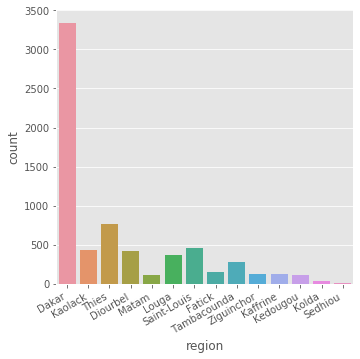

In [1602]:
ax = sns.catplot(x='region',kind='count',data=data,orient="h")
ax.fig.autofmt_xdate()

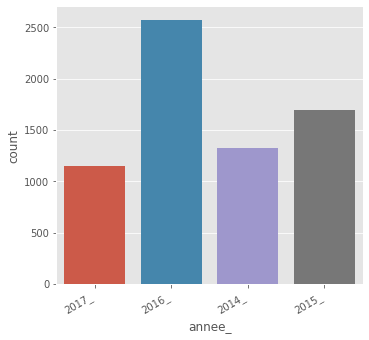

In [1603]:
ax = sns.catplot(x='annee_',kind='count',data=data,orient="h")
ax.fig.autofmt_xdate()

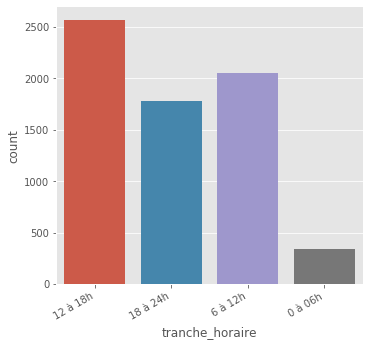

In [1604]:
ax = sns.catplot(x='tranche_horaire',kind='count',data=data,orient="h", label='fkff')
ax.fig.autofmt_xdate()

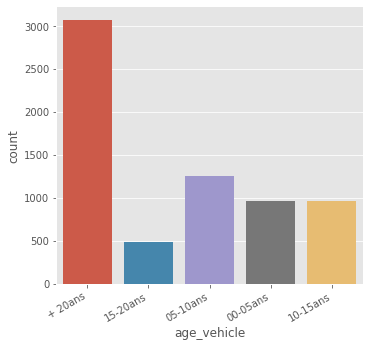

In [1605]:
ax = sns.catplot(x='age_vehicle',kind='count',data=data,orient="h", label='fkff')
ax.fig.autofmt_xdate()

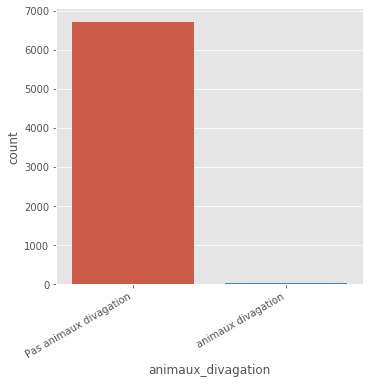

In [1606]:
ax = sns.catplot(x='animaux_divagation',kind='count',data=data,orient="h")
ax.fig.autofmt_xdate()

In [1607]:
#!pip install mca

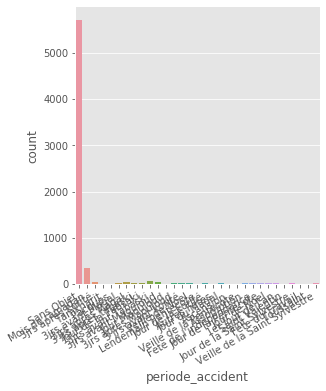

In [1608]:
ax = sns.catplot(x='periode_accident',kind='count',data=data,orient="h")
ax.fig.autofmt_xdate()

## > Analyse des Composantes Multiples (A.C.M)

#### Construction d'une matrice X qui contient les variables pour l'analyse:

In [1609]:
X=data.loc[:,['nature_degats_causes_accident','nb_veh_impl','vehic_usage',
              'vehic_type','analyse_responsabilite','age_permis','origine_permis',
              'profession_conduc_r','sexe_conducteur','tranche_age','tranche_horaire','annee_','region']].as_matrix()

C:\Users\FAITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1610]:
#Construction du modèle mca 
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns)

In [1611]:
my_mca.fit(X)

MCA(n_components=None,
    row_labels=array([   0,    1,    2, ..., 6736, 6737, 6738], dtype=int64),
    stats=True,
    var_labels=Index(['nature_degats_causes_accident', 'nb_veh_impl',
       'analyse_responsabilite', 'vehic_type', 'vehic_usage', 'visite_techni',
       'age_vehicle', 'assurance2', 'assurance_auto', 'date_accident',
       'jour_accident', 'jour_ferie', 'mois_accident', 'tranche_horaire',
       'peri...
       'etat_route', 'agglom_camp', 'cas_virage', 'intersection',
       'regles_priorite', 'impact_luminosite_moment_acciden', 'luminosite',
       'impact_conditions_atmospheriques', 'condit_atmosph',
       'conduite_etat_ebriete', 'perte_controle_conducteur',
       'Depassement_defectueux', 'stationnement_irregulier', 'exces_vitesse',
       'non_resp_pann_signal', 'ralentisseurs', 'animaux_divagation',
       'absence_signalisation', 'annee_'],
      dtype='object'))

In [1612]:
#nombre var. actives
p = X.shape[1]-1
#print(p)
#calcul des fonctions de projection
import pandas 
import numpy
fproj = numpy.zeros(my_mca.col_coord_.shape)
#pour chaque colonne
for j in range(fproj.shape[1]):
    fproj[:,j] = my_mca.col_coord_[:,j]/(p*numpy.sqrt(my_mca.eig_[0,j]))

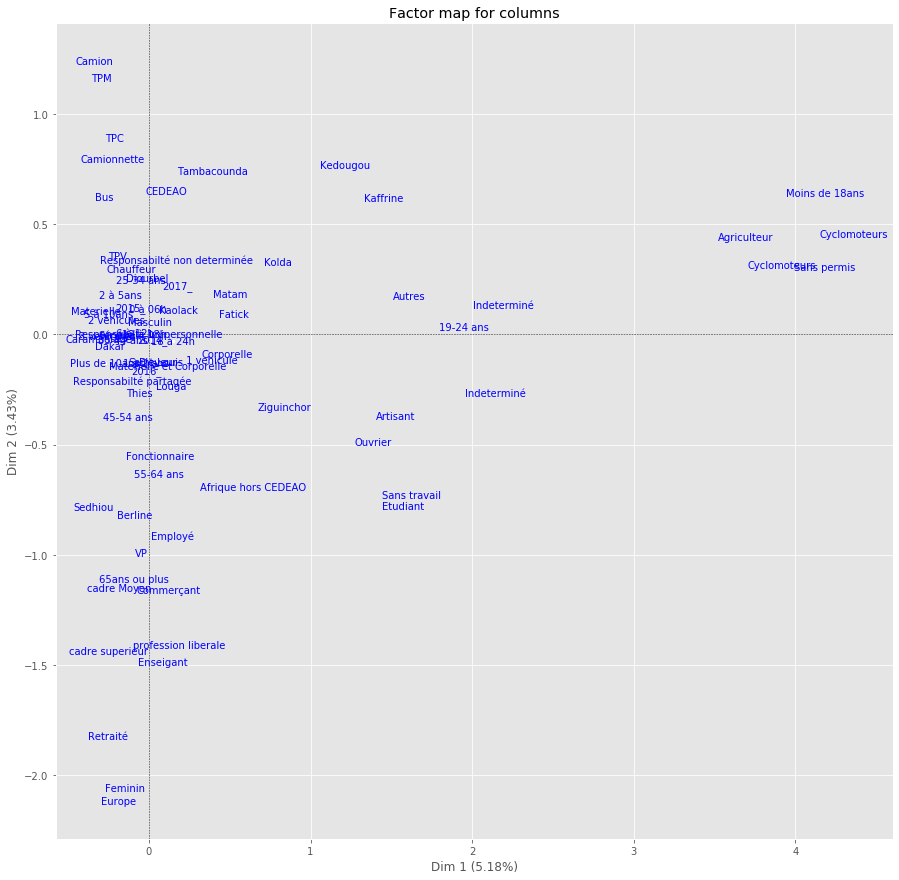

In [1613]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(15, 15))

## K-Modes Clustering

<p> Description de l'algorithme de clustering k-modes:<p>
    
La technique k-modes clustering est une version améliorée de l'algorithme traditionnel des k moyens.
Les principales extensions de l'algorithme des k-moyens à l'algorithme des k-modes sont la mesure de la distance et le processus de partitionnement qui sont expliqués ci-dessous :

<p> Distance measure <p>
    
Étant donné un ensemble de données D, la distance entre deux objets X et Y, où X et Y sont décrits par N variables catégorielles, peut être calculée comme suit :
    
   $$ d(X, Y ) = \sum \delta(X_i, Y_i) $$

ou


$$ \delta(X_i, Y_i) = \begin{cases}
   0 & \quad \mbox{si }   X_i = Y_i \\ 
   1 &  \quad \mbox{si }  X_i \neq Y_i 
                      \end{cases}
$$


Dans les équations ci-dessus, $X_i$ et $Y_i$ sont les valeurs de l'attribut i dans l'objet X et Y. Cette mesure de distance est souvent appelée mesure de dissimilarité de correspondance simple. Plus le nombre de différences entre les valeurs catégorielles de X et Y est élevé, plus les deux objets sont différents.


<p> Procédure de l'algorithme k-modes :<p>
    
Afin de regrouper l'ensemble de données D en k clusters, l'algorithme de clustering k-modes exécute les étapes suivantes :
<p> 1. Sélectionner initialement k objets aléatoires comme centres ou modes de regroupement.<p>
<p> 2. Trouver la distance entre chaque objet et le centre de la grappe en utilisant la mesure de distance
défini dans l'équation 1.<p>
<p> 3. Assignez chaque objet au groupe dont la distance avec l'objet est minimale.<p>
<p> 4. Sélectionner un nouveau centre ou mode pour chaque cluster et le comparer avec la valeur précédente <p>
du centre ou du mode ; si les valeurs sont différentes, passez à l'étape 2.



<p>Les données étudiées proviennent du Ministère de l'économie et des finances (MEF) par le biais d'une enquête menée en 2017 par sa cellule de l'Observatoire de la Qualité des Services Financiers (OQSF) qui travaille avec en collaboration avec des sociétés d'assurance. L'enquête consistait à répertorier, sur l'ensemble du territoire national, les circonstances des cas d'accident survenus entre 2014 et 2017. Les données collectées à l'aide d'un questionnaire portaient entre autres sur le lieu, la date, le jour, l'heure, le type de véhicule, l'usage du véhicule, etc. La base de données compte 6739 cas d’accident.<p>
<p>Après le prétraitement des données, 11 variables ont été identifiées comme satisfaisantes pour la recherche. <p>

In [1614]:
data=data.loc[:,['nature_degats_causes_accident','nb_veh_impl','vehic_usage',
              'vehic_type','age_permis','age_vehicle',
              'profession_conduc_r','tranche_age','tranche_horaire','annee_','region']]

#### First we will keep a copy of data :

In [1615]:
data_copy = data.copy()

In [1616]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head()

,nature_degats_causes_accident,nb_veh_impl,vehic_usage,vehic_type,age_permis,age_vehicle,profession_conduc_r,tranche_age,tranche_horaire,annee_,region
0,1,1,1,2,4,0,2,1,1,3,0
1,1,1,1,3,4,4,2,2,2,3,0
2,1,1,1,2,4,0,2,2,1,3,0
3,1,1,4,0,4,2,13,1,3,3,0
4,1,1,1,2,1,0,2,2,1,3,0


In [1617]:
# Importing Libraries
from kmodes.kmodes import KModes

In [1618]:
#!pip install kmodes

In [1619]:
km_cao = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1241, cost: 35001.0


In [1620]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [1621]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = data.columns

In [1622]:
# Mode of the clusters
clusterCentroidsDf

,nature_degats_causes_accident,nb_veh_impl,vehic_usage,vehic_type,age_permis,age_vehicle,profession_conduc_r,tranche_age,tranche_horaire,annee_,region
0,1,1,4,0,4,0,2,1,1,2,0
1,1,1,3,1,2,0,2,1,2,2,0


### Choosing K by comparing Cost against each K

In [1623]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 38032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 434, cost: 34269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 863, cost: 32474.0
Run 1, iteration: 2/100, moves: 271, cost: 32474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 884, cost: 31441.0
Run 1, iteration: 2/100, moves: 213, cost: 31441.0


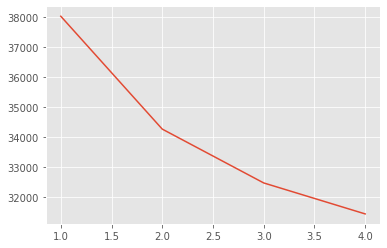

In [1624]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

### Choosing K=3

In [1625]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 863, cost: 32474.0
Run 1, iteration: 2/100, moves: 271, cost: 32474.0


In [1626]:
fitClusters_cao

array([0, 2, 0, ..., 0, 0, 1], dtype=uint16)

In [1627]:
#Combining the predicted clusters with the original DF.
data = data_copy.reset_index()

In [1628]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [1629]:
combinedDf.head()

,nature_degats_causes_accident,nb_veh_impl,vehic_usage,vehic_type,age_permis,age_vehicle,profession_conduc_r,tranche_age,tranche_horaire,annee_,region,cluster_predicted
0,Materielle,2 vehicules,TPC,Camion,Plus de 10ans,+ 20ans,Chauffeur,25-34 ans,12 à 18h,2017_,Dakar,0
1,Materielle,2 vehicules,TPC,Camionnette,Plus de 10ans,15-20ans,Chauffeur,35-44 ans,18 à 24h,2017_,Dakar,2
2,Materielle,2 vehicules,TPC,Camion,Plus de 10ans,+ 20ans,Chauffeur,35-44 ans,12 à 18h,2017_,Dakar,0
3,Materielle,2 vehicules,VP,Berline,Plus de 10ans,05-10ans,cadre superieur,25-34 ans,6 à 12h,2017_,Dakar,0
4,Materielle,2 vehicules,TPC,Camion,2 à 5ans,+ 20ans,Chauffeur,35-44 ans,12 à 18h,2017_,Dakar,2


In [1630]:
combinedDf['cluster_predicted']

0       0
1       2
2       0
3       0
4       2
       ..
6734    1
6735    1
6736    0
6737    0
6738    1
Name: cluster_predicted, Length: 6739, dtype: uint16

In [1631]:
#Cluster Identification
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_0.drop(['cluster_predicted'], axis='columns', inplace=True, index=None)
cluster_1.drop(['cluster_predicted'], axis='columns', inplace=True, index=None)
cluster_2.drop(['cluster_predicted'], axis='columns', inplace=True, index=None)

C:\Users\FAITH\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


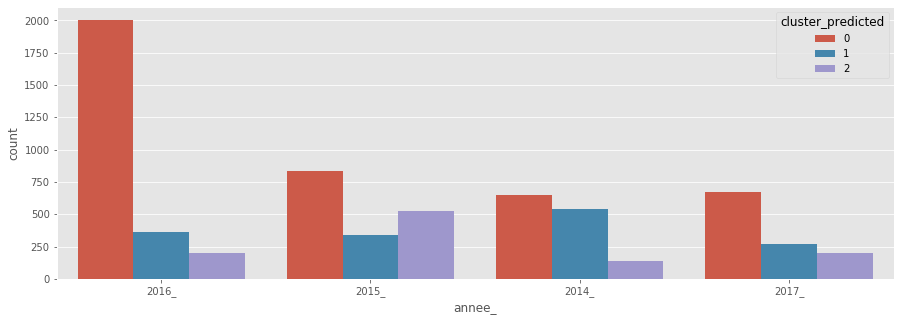

In [1632]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['annee_'],order=combinedDf['annee_'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [1633]:
cluster_0.head()

,nature_degats_causes_accident,nb_veh_impl,vehic_usage,vehic_type,age_permis,age_vehicle,profession_conduc_r,tranche_age,tranche_horaire,annee_,region
0,Materielle,2 vehicules,TPC,Camion,Plus de 10ans,+ 20ans,Chauffeur,25-34 ans,12 à 18h,2017_,Dakar
2,Materielle,2 vehicules,TPC,Camion,Plus de 10ans,+ 20ans,Chauffeur,35-44 ans,12 à 18h,2017_,Dakar
3,Materielle,2 vehicules,VP,Berline,Plus de 10ans,05-10ans,cadre superieur,25-34 ans,6 à 12h,2017_,Dakar
5,Materielle,2 vehicules,VP,Berline,Plus de 10ans,+ 20ans,Chauffeur,35-44 ans,12 à 18h,2017_,Dakar
6,Materielle,2 vehicules,TPM,Camion,2 à 5ans,00-05ans,Chauffeur,25-34 ans,12 à 18h,2017_,Dakar


In [1634]:
cluster_1.head()

,nature_degats_causes_accident,nb_veh_impl,vehic_usage,vehic_type,age_permis,age_vehicle,profession_conduc_r,tranche_age,tranche_horaire,annee_,region
27,Materielle,2 vehicules,TPV,Bus,Plus de 10ans,05-10ans,Chauffeur,35-44 ans,18 à 24h,2014_,Kaolack
32,Materielle,2 vehicules,TPV,Berline,5 à 10ans,+ 20ans,Chauffeur,55-64 ans,6 à 12h,2014_,Kaolack
36,Corporelle,1 vehicule,TPV,Bus,Plus de 10ans,00-05ans,Chauffeur,25-34 ans,12 à 18h,2017_,Dakar
37,Corporelle,1 vehicule,TPV,Bus,Plus de 10ans,+ 20ans,Chauffeur,25-34 ans,18 à 24h,2017_,Dakar
38,Corporelle,1 vehicule,TPV,Bus,2 à 5ans,00-05ans,Chauffeur,25-34 ans,18 à 24h,2017_,Dakar


In [1635]:
cluster_2.head()

,nature_degats_causes_accident,nb_veh_impl,vehic_usage,vehic_type,age_permis,age_vehicle,profession_conduc_r,tranche_age,tranche_horaire,annee_,region
1,Materielle,2 vehicules,TPC,Camionnette,Plus de 10ans,15-20ans,Chauffeur,35-44 ans,18 à 24h,2017_,Dakar
4,Materielle,2 vehicules,TPC,Camion,2 à 5ans,+ 20ans,Chauffeur,35-44 ans,12 à 18h,2017_,Dakar
7,Materielle,2 vehicules,TPM,Camion,Plus de 10ans,+ 20ans,Chauffeur,25-34 ans,18 à 24h,2017_,Dakar
14,Materielle,2 vehicules,TPC,Camion,1 à 2 ans,15-20ans,Chauffeur,45-54 ans,6 à 12h,2017_,Dakar
16,Materielle,2 vehicules,TPV,Bus,5 à 10ans,05-10ans,Chauffeur,35-44 ans,18 à 24h,2017_,Dakar


In [1636]:
cluster_0.shape

(4162, 11)

In [1637]:
cluster_1.shape

(1512, 11)

In [1638]:
cluster_2.shape

(1065, 11)

## A ssociation rules mining: Apriori Algorithm in each cluster

L'extraction de règles d'association est une technique d'exploration de données très populaire qui extrait des relations intéressantes et cachées entre divers attributs dans un grand ensemble de données. L'extraction de règles d'association produit un ensemble de règles qui définissent les modèles sous-jacents dans l'ensemble de données.
L'associativité de deux caractéristiques d'un accident est déterminée par la fréquence de leur apparition simultanée dans l'ensemble de données. Une règle A → B indique que si A se produit, alors B se produira également.


<p> Mesures d'évaluation des règles <p>
Une règle d'association est considérée comme une règle forte si elle satisfait au seuil minimum critères, c'est-à-dire la confiance et le support. Un seuil minimum S d'une règle A → B indique qu'en x % de toutes les transactions A et B ensemble se produit et qu'il peut être calculé par: $$ Support = P(A \cap B) $$

Considérant qu'un intervalle de confiance C d'une règle indique qu'en C % de toutes les transactions lorsque A se produit alors B se produit également et il peut être calculé par: $$Confidence = P(A|B)=\frac{P(A \cap B)}{P(A)}$$

Lift est une autre mesure d'évaluation d'une règle, qui peut être calculée par: $$lift=\frac{P(A \cap B)}{P(A)P(B)}$$

Une valeur supérieure à 1 pour les mesures de lift indique que l'apparition de A et B ensemble est supérieure à attendu alors qu'une valeur inférieure à 1 indique l'inverse du concept. On considère donc qu'une règle aussi forte si elle a une valeur supérieure à 1 pour le paramètre de lift.

Apriori que nous allons utiliser exige que notre ensemble de données se présente sous la forme de listes, où l'ensemble de données est une grande liste et chaque transaction dans l'ensemble de données est une liste intérieure dans la grande liste extérieure. Actuellement, nous disposons de données sous la forme data frame pandas. Pour convertir les données sur les pandas en une liste pour chaque cluster, exécutons le script suivant :

In [1639]:
records_cluster_0 = []
for i_0 in range(0, 4162):
    records_cluster_0.append([str(cluster_0.values[i_0,j_0]) for j_0 in range(0, 11)])

In [1640]:
records_cluster_1 = []
for i_1 in range(0, 1512):
    records_cluster_1.append([str(cluster_1.values[i_1,j_1]) for j_1 in range(0, 11)])

In [1641]:
records_cluster_2 = []
for i_2 in range(0, 1065):
    records_cluster_2.append([str(cluster_2.values[i_2,j_2]) for j_2 in range(0, 11)])

### Application de l'algorithme apriori sur chaque cluster :

In [1648]:
from efficient_apriori import apriori

itemsets, rules = apriori(records_cluster_0, min_support=0.25, min_confidence=0.85)

# Print out every rule with 2 items on the left hand side,
# 1 item on the right hand side, sorted by lift
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule) #rints the rule and its confidence, support, lift, ...

{+ 20ans, 2 vehicules} -> {Chauffeur} (conf: 0.860, supp: 0.251, lift: 1.203, conv: 2.035)
{Materielle, VP} -> {2 vehicules} (conf: 0.888, supp: 0.285, lift: 1.252, conv: 2.595)
{Berline, Materielle} -> {2 vehicules} (conf: 0.889, supp: 0.330, lift: 1.253, conv: 2.614)
{12 à 18h, Materielle} -> {2 vehicules} (conf: 0.896, supp: 0.271, lift: 1.264, conv: 2.811)
{Materielle, Plus de 10ans} -> {2 vehicules} (conf: 0.905, supp: 0.266, lift: 1.276, conv: 3.049)
{Chauffeur, Materielle} -> {2 vehicules} (conf: 0.907, supp: 0.387, lift: 1.279, conv: 3.115)
{Dakar, Materielle} -> {2 vehicules} (conf: 0.923, supp: 0.350, lift: 1.302, conv: 3.797)
{Dakar, VP} -> {Berline} (conf: 0.963, supp: 0.291, lift: 1.400, conv: 8.367)
{2016_, VP} -> {Berline} (conf: 0.968, supp: 0.260, lift: 1.408, conv: 9.699)
{Chauffeur, VP} -> {Berline} (conf: 0.971, supp: 0.344, lift: 1.412, conv: 10.730)
{2 vehicules, VP} -> {Berline} (conf: 0.971, supp: 0.380, lift: 1.413, conv: 10.834)
{Materielle, VP} -> {Berline} (

On voit ici (dernière règle) par exemple si le nombre de vehicules impliqué est 2 vehicules et l'accident s'est produit a Dakar alors le degat de l'accident est materielle avec un niveau confiance de 87%....

In [1649]:
from efficient_apriori import apriori

itemsets, rules = apriori(records_cluster_1, min_support=0.25, min_confidence=0.85)

# Print out every rule with 2 items on the left hand side,
# 1 item on the right hand side, sorted by lift
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule) #rints the rule and its confidence, support, lift, ...

{ 1 vehicule, Corporelle} -> {Chauffeur} (conf: 0.851, supp: 0.556, lift: 0.980, conv: 0.885)
{6 à 12h, Corporelle} -> {Chauffeur} (conf: 0.861, supp: 0.255, lift: 0.992, conv: 0.949)
{ 1 vehicule, 6 à 12h} -> {Chauffeur} (conf: 0.865, supp: 0.287, lift: 0.996, conv: 0.972)
{+ 20ans, Corporelle} -> {Chauffeur} (conf: 0.922, supp: 0.342, lift: 1.061, conv: 1.678)
{ 1 vehicule, + 20ans} -> {Chauffeur} (conf: 0.925, supp: 0.392, lift: 1.065, conv: 1.758)
{ 1 vehicule, 25-34 ans} -> {Chauffeur} (conf: 0.934, supp: 0.261, lift: 1.075, conv: 1.988)
{ 1 vehicule, Plus de 10ans} -> {Chauffeur} (conf: 0.936, supp: 0.263, lift: 1.078, conv: 2.072)
{35-44 ans, TPV} -> {Chauffeur} (conf: 0.973, supp: 0.259, lift: 1.120, conv: 4.822)
{Dakar, TPV} -> {Chauffeur} (conf: 0.973, supp: 0.259, lift: 1.120, conv: 4.822)
{+ 20ans, TPV} -> {Chauffeur} (conf: 0.975, supp: 0.380, lift: 1.122, conv: 5.177)
{Corporelle, TPV} -> {Chauffeur} (conf: 0.975, supp: 0.367, lift: 1.123, conv: 5.349)
{ 1 vehicule, TPV} 

On voit ici (dernière règle) par exemple si l'age vehicule responsable l'accident est entre +20 ans et le vehicule est un Bus l'usage du vehicule est transport de voyageurs avec un niveau de confiance de 97.5% ....

In [1650]:
from efficient_apriori import apriori

itemsets, rules = apriori(records_cluster_2, min_support=0.25, min_confidence=0.85)

# Print out every rule with 2 items on the left hand side,
# 1 item on the right hand side, sorted by lift
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule) #rints the rule and its confidence, support, lift, ...

{2015_, Materielle} -> {Chauffeur} (conf: 0.881, supp: 0.335, lift: 0.975, conv: 0.808)
{2 vehicules, 2015_} -> {Chauffeur} (conf: 0.885, supp: 0.369, lift: 0.979, conv: 0.834)
{2015_, Dakar} -> {Chauffeur} (conf: 0.885, supp: 0.261, lift: 0.979, conv: 0.835)
{5 à 10ans, Materielle} -> {Chauffeur} (conf: 0.886, supp: 0.276, lift: 0.979, conv: 0.837)
{2 vehicules, 5 à 10ans} -> {Chauffeur} (conf: 0.890, supp: 0.304, lift: 0.984, conv: 0.872)
{18 à 24h, 2 vehicules} -> {Chauffeur} (conf: 0.895, supp: 0.346, lift: 0.990, conv: 0.915)
{18 à 24h, Materielle} -> {Chauffeur} (conf: 0.896, supp: 0.300, lift: 0.991, conv: 0.922)
{35-44 ans, Materielle} -> {Chauffeur} (conf: 0.905, supp: 0.356, lift: 1.000, conv: 1.003)
{2015_, Chauffeur} -> {2 vehicules} (conf: 0.852, supp: 0.369, lift: 1.001, conv: 1.006)
{2 vehicules, 35-44 ans} -> {Chauffeur} (conf: 0.906, supp: 0.388, lift: 1.002, conv: 1.016)
{2 vehicules, Dakar} -> {Chauffeur} (conf: 0.910, supp: 0.437, lift: 1.006, conv: 1.064)
{Dakar, M

On voit ici (dernière règle) par exemple si l'age du conducteur présumé responsable l'accident est entre 35-44 ans et l'accident s'est produit a Dakar alors le dégat de l'accident est materielle avec un niveau de confiance de 91.5% ....